This notebook analyzes a dataset containing agricultural soil and climate data in order to classify different crop types. The goal is to explore how environmental factors—such as nutrient composition, temperature, humidity, pH, and precipitation—relate to the recommended type of crop.

The dataset, `tipo_cultivo.csv`, includes several key features that describe the conditions of the soil and climate, as well as the recommended crop type. This information can support agronomists and farmers in making data-driven decisions about optimal crop selection based on local environmental conditions.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
pd.set_option('display.float_format', lambda x: '%.3f' % x)

Variable Description

The dataset includes the following variables:

- **Contenido_de_Nitrogeno**: Proportion of nitrogen content in the soil.
- **Contenido_de_Fosforo**: Proportion of phosphorus content in the soil.
- **Contenido_de_Potasio**: Proportion of potassium content in the soil.
- **Temperatura_C**: Temperature in degrees Celsius.
- **Humedad_Relativa**: Relative humidity as a percentage.
- **Nivel_de_pH**: Soil pH level.
- **Precipitacion_mm**: Amount of precipitation in millimeters.
- **Tipo_de_Cultivo**: Type of crop recommended based on the above parameters (target variable).


Exploratory Data Analysis (EDA)

To perform a comprehensive EDA, we will address the following key questions:

1. How are the values distributed across each variable?

We'll inspect the distributions of individual features using histograms and boxplots, and identify potential skewness or outliers.

2. Are there correlations between soil/climate variables and crop types?

We’ll compute the correlation matrix and visualize it using a heatmap to explore relationships between variables.

3. How does crop recommendation vary according to soil and climate conditions?

We'll analyze trends and patterns that may indicate which environmental conditions are more suitable for certain crop types.

4. Are there any missing or outlier values that need to be handled?

Through descriptive statistics and boxplots, we'll identify anomalies and assess whether data cleaning steps such as imputation or removal are necessary.



Import the CSV file


In [3]:
df = pd.read_csv('tipo_cultivo.csv')
cultivos = df.copy()
cultivos.shape


(2200, 9)

Start of the Exploratory Data Analysis (EDA)


The dataset contains 2200 rows and 9 columns


In [4]:
cultivos.head()

,Unnamed: 0,Contenido_de_Nitrogeno,Contenido_de_Fosforo,Contenido_de_Potasio,Temperatura_C,Humedad_Relativa,Nivel_de_pH,Precipitacion_mm,Tipo_de_Cultivo
0,0,90,42,43,20.880,82.003,6.503,202.936,rice
1,1,85,58,41,21.770,80.320,7.038,226.656,rice
2,2,60,55,44,23.004,82.321,7.840,263.964,rice
3,3,74,35,40,26.491,80.158,6.980,242.864,rice
4,4,78,42,42,20.130,81.605,7.628,262.717,rice


In [5]:
cultivos.tail()

,Unnamed: 0,Contenido_de_Nitrogeno,Contenido_de_Fosforo,Contenido_de_Potasio,Temperatura_C,Humedad_Relativa,Nivel_de_pH,Precipitacion_mm,Tipo_de_Cultivo
2195,2195,107,34,32,26.775,66.413,6.780,177.775,coffee
2196,2196,99,15,27,27.417,56.636,6.087,127.925,coffee
2197,2197,118,33,30,24.132,67.225,6.363,173.323,coffee
2198,2198,117,32,34,26.272,52.127,6.759,127.175,coffee
2199,2199,104,18,30,23.603,60.396,6.780,140.937,coffee


Data types


In [6]:
cultivos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              2200 non-null   int64  
 1   Contenido_de_Nitrogeno  2200 non-null   int64  
 2   Contenido_de_Fosforo    2200 non-null   int64  
 3   Contenido_de_Potasio    2200 non-null   int64  
 4   Temperatura_C           2200 non-null   float64
 5   Humedad_Relativa        2200 non-null   float64
 6   Nivel_de_pH             2200 non-null   float64
 7   Precipitacion_mm        2200 non-null   float64
 8   Tipo_de_Cultivo         2200 non-null   object 
dtypes: float64(4), int64(4), object(1)
memory usage: 154.8+ KB


In [7]:
cultivos = cultivos.drop(columns=['Unnamed: 0']) #borro esta columna para not ener doble indice

With `validate_columns`, I can inspect the dataset's columns, including:

- Column names
- Number of unique values per column (and which they are)
- Count and percentage of missing (null) values
- A sample of values from each column


In [2]:
from funciones_importantes import validate_columns


In [9]:
validate_columns(cultivos)

,Column,Unique_Values,Num_Unique_Values,Num_Null_Values,Sample_Unique_Values,%_null
0,Contenido_de_Nitrogeno,"[90, 85, 60, 74, 78, 69, 94, 89, 68, 91, 93, 7...",137,0,"[77, 95, 120, 80, 44]",0.000
1,Contenido_de_Fosforo,"[42, 58, 55, 35, 37, 53, 54, 46, 56, 50, 48, 3...",117,0,"[76, 53, 35, 64, 15]",0.000
2,Contenido_de_Potasio,"[43, 41, 44, 40, 42, 38, 36, 37, 39, 35, 45, 1...",73,0,"[195, 85, 195, 78, 52]",0.000
3,Temperatura_C,"[20.87974371, 21.77046169, 23.00445915, 26.491...",2200,0,"[22.21738222, 21.53574127, 26.762749300000007,...",0.000
4,Humedad_Relativa,"[82.00274423, 80.31964408, 82.3207629, 80.1583...",2200,0,"[89.28272716, 93.56585985, 44.2252605, 24.3567...",0.000
5,Nivel_de_pH,"[6.502985292000001, 7.038096361, 7.840207144, ...",2200,0,"[6.400321212000001, 6.185053234, 6.822282114, ...",0.000
6,Precipitacion_mm,"[202.9355362, 226.6555374, 263.9642476, 242.86...",2200,0,"[235.6133585, 119.84797, 74.51490791, 104.5412...",0.000
7,Tipo_de_Cultivo,"[rice, maize, chickpea, kidneybeans, pigeonpea...",22,0,"[muskmelon, mango, jute, apple, orange]",0.000


It is observed that the dataset does not contain any missing (null) values, so I will proceed with the analysis.


I can observe that the column Tipo_de_Cultivo contains 22 unique values, which suggests that there are 22 different crop types. These crop types are likely to be influenced—either positively or negatively—by the other variables such as humidity, potassium, phosphorus, precipitation, temperature, pH level, nitrogen content, etc.


In [10]:
cultivos.describe() #medidas estdisticas simples para cada columna


,Contenido_de_Nitrogeno,Contenido_de_Fosforo,Contenido_de_Potasio,Temperatura_C,Humedad_Relativa,Nivel_de_pH,Precipitacion_mm
count,2200.000,2200.000,2200.000,2200.000,2200.000,2200.000,2200.000
mean,50.552,53.363,48.149,25.616,71.482,6.469,103.464
std,36.917,32.986,50.648,5.064,22.264,0.774,54.958
min,0.000,5.000,5.000,8.826,14.258,3.505,20.211
25%,21.000,28.000,20.000,22.769,60.262,5.972,64.552
50%,37.000,51.000,32.000,25.599,80.473,6.425,94.868
75%,84.250,68.000,49.000,28.562,89.949,6.924,124.268
max,140.000,145.000,205.000,43.675,99.982,9.935,298.560


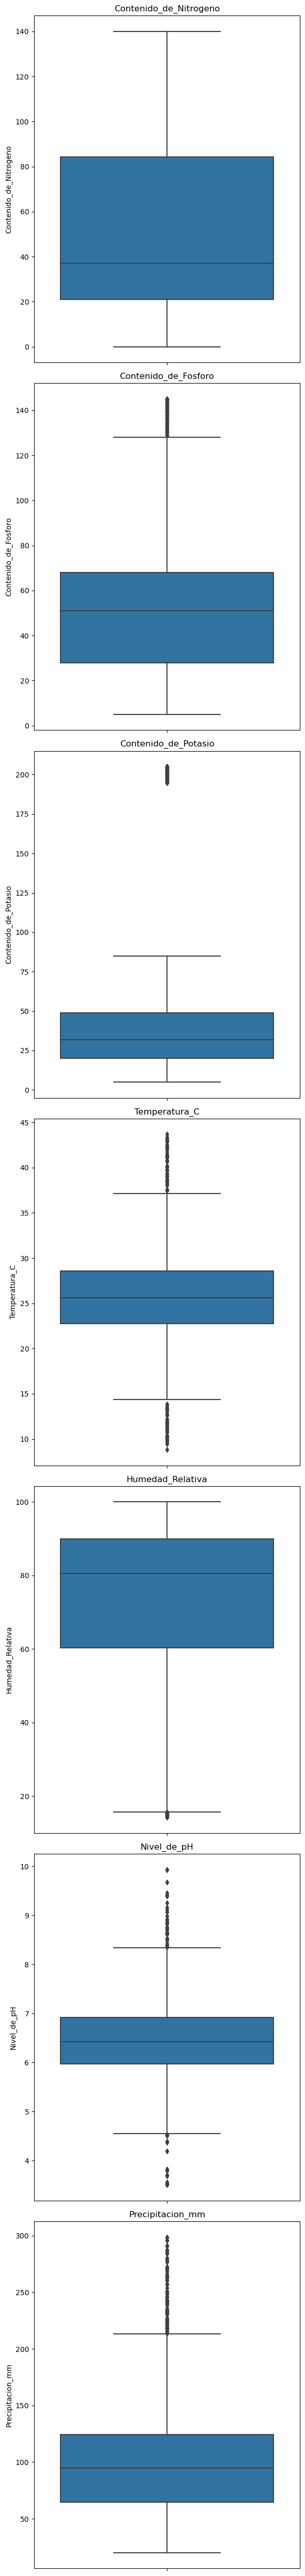

In [11]:
from funciones_importantes import grafico_out_boxplot
grafico_out_boxplot(cultivos)

I examine the outliers, specifically those in the potassium content variable. After conducting some research online, I found that certain crop types specifically require either very high or very low levels of potassium in the soil. Therefore, the outlier values in this category will not be removed, as they might provide useful insights into which crop types require such extreme potassium levels.


Outliers from the remaining columns will not be removed either, as the values are considered plausible and can occur naturally in real-world agricultural conditions.


Next, I create histograms to visualize how the data in each column is distributed. This helps identify any trends or skewness in measures of central tendency.


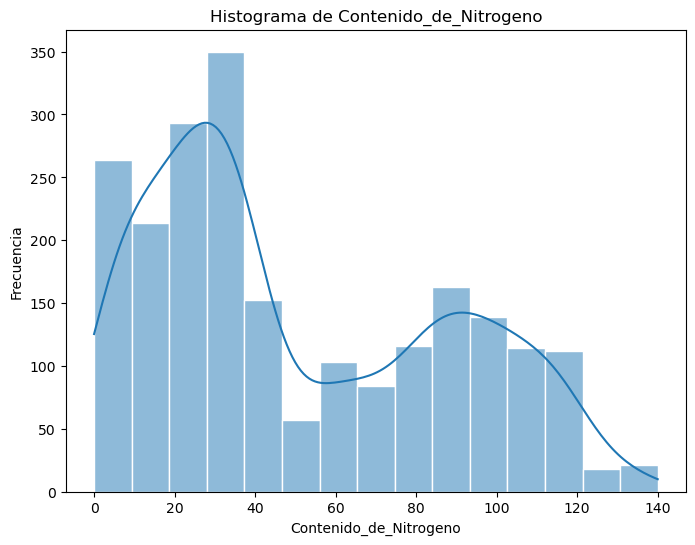

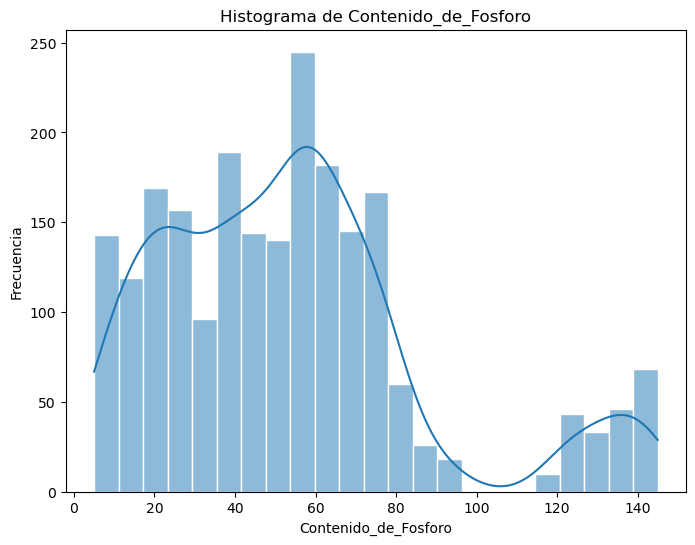

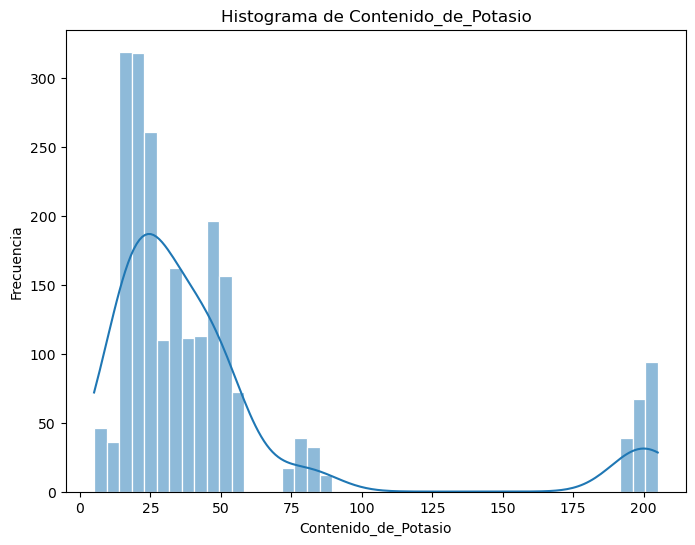

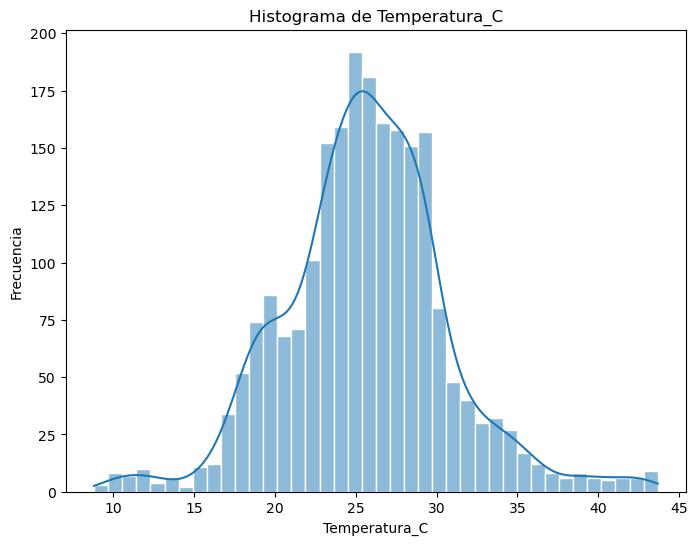

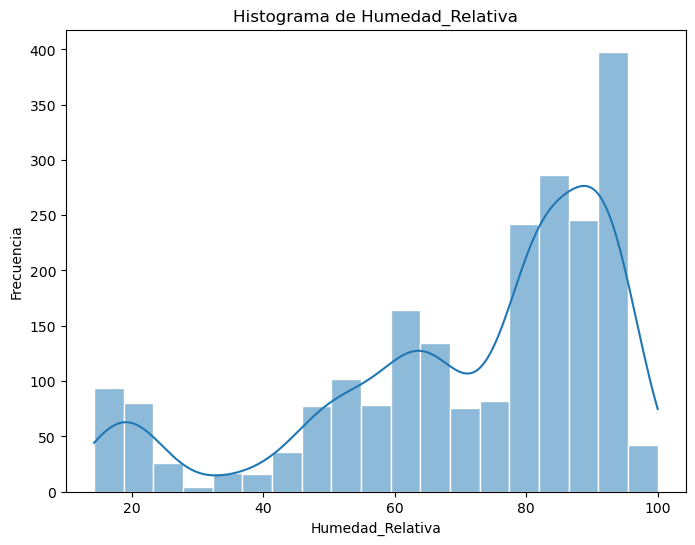

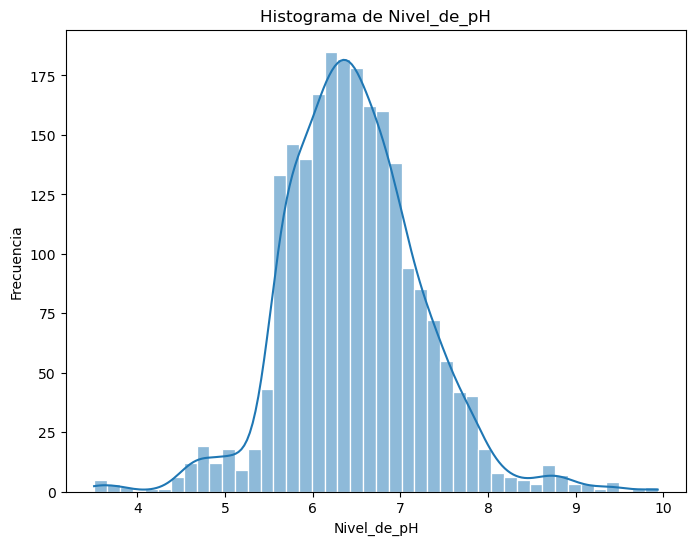

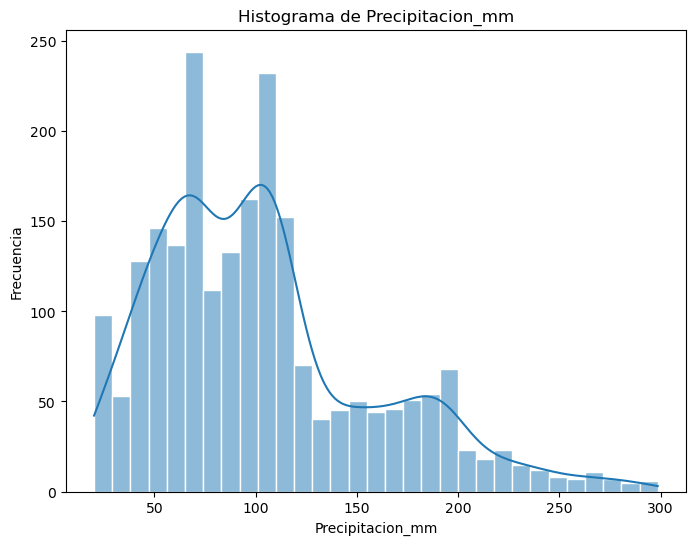

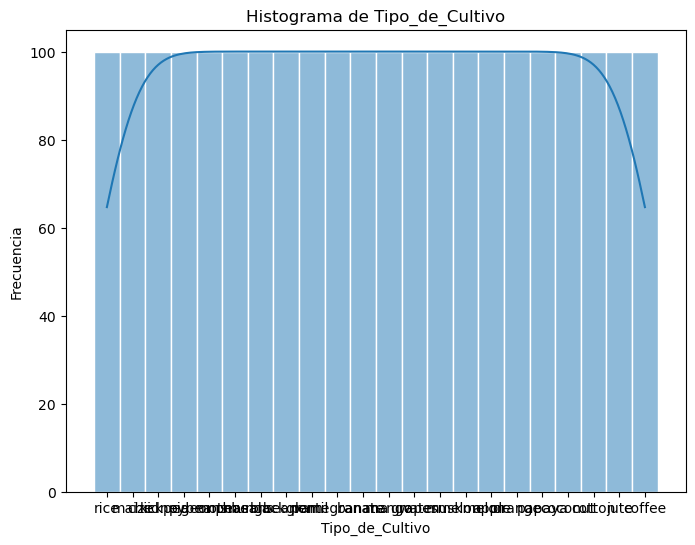

In [12]:
from funciones_importantes import plot_histograms

plot_histograms(cultivos)

Are there correlations between the different soil variables and the types of crops?



Next, I import `OneHotEncoder` to encode my `Tipo_de_Cultivo` column, which currently contains the crop names. After fitting it, the encoder will transform the data into


In [13]:
from sklearn.preprocessing import OneHotEncoder

tipodecultivo_ohe = OneHotEncoder(sparse=False)
tipodecultivo_ohe.fit(cultivos[['Tipo_de_Cultivo']])
tipodecultivo_ohe.categories_

c:\Users\chiar\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[array(['apple', 'banana', 'blackgram', 'chickpea', 'coconut', 'coffee',
        'cotton', 'grapes', 'jute', 'kidneybeans', 'lentil', 'maize',
        'mango', 'mothbeans', 'mungbean', 'muskmelon', 'orange', 'papaya',
        'pigeonpeas', 'pomegranate', 'rice', 'watermelon'], dtype=object)]

In [14]:
cultivos.columns

Index(['Contenido_de_Nitrogeno', 'Contenido_de_Fosforo',
       'Contenido_de_Potasio', 'Temperatura_C', 'Humedad_Relativa',
       'Nivel_de_pH', 'Precipitacion_mm', 'Tipo_de_Cultivo'],
      dtype='object')

In [15]:
cultivos['apple'],cultivos['banana'],cultivos['blackgram'],cultivos['chickpea'],cultivos['coconut'],cultivos['coffee'],cultivos['cotton'],cultivos['grapes'],cultivos['jute'],cultivos['kidneybeans'],cultivos['lentil'],cultivos['maize'],cultivos['mango'],cultivos['mothbeans'],cultivos['mungbean'],cultivos['muskmelon'],cultivos['orange'],cultivos['papaya'],cultivos['pigeonpeas'],cultivos['pomegranate'],cultivos['rice'],cultivos['watermelon'] = tipodecultivo_ohe.fit_transform(cultivos[['Tipo_de_Cultivo']]).T 
#cultivos.drop(columns=['Tipo_de_Cultivo'], inplace=True) 
cultivos.head()

c:\Users\chiar\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Contenido_de_Nitrogeno,Contenido_de_Fosforo,Contenido_de_Potasio,Temperatura_C,Humedad_Relativa,Nivel_de_pH,Precipitacion_mm,Tipo_de_Cultivo,apple,banana,...,mango,mothbeans,mungbean,muskmelon,orange,papaya,pigeonpeas,pomegranate,rice,watermelon
0,90,42,43,20.880,82.003,6.503,202.936,rice,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000
1,85,58,41,21.770,80.320,7.038,226.656,rice,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000
2,60,55,44,23.004,82.321,7.840,263.964,rice,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000
3,74,35,40,26.491,80.158,6.980,242.864,rice,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000
4,78,42,42,20.130,81.605,7.628,262.717,rice,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000


I need to create a boxplot showing the relationship of each variable by crop type.


In [16]:
cultivos2=cultivos.drop(columns=['Tipo_de_Cultivo'])
cultivos2

,Contenido_de_Nitrogeno,Contenido_de_Fosforo,Contenido_de_Potasio,Temperatura_C,Humedad_Relativa,Nivel_de_pH,Precipitacion_mm,apple,banana,blackgram,...,mango,mothbeans,mungbean,muskmelon,orange,papaya,pigeonpeas,pomegranate,rice,watermelon
0,90,42,43,20.880,82.003,6.503,202.936,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000
1,85,58,41,21.770,80.320,7.038,226.656,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000
2,60,55,44,23.004,82.321,7.840,263.964,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000
3,74,35,40,26.491,80.158,6.980,242.864,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000
4,78,42,42,20.130,81.605,7.628,262.717,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.775,66.413,6.780,177.775,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2196,99,15,27,27.417,56.636,6.087,127.925,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2197,118,33,30,24.132,67.225,6.363,173.323,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2198,117,32,34,26.272,52.127,6.759,127.175,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


Are there correlations between the different soil variables and the crop types?



<Axes: >

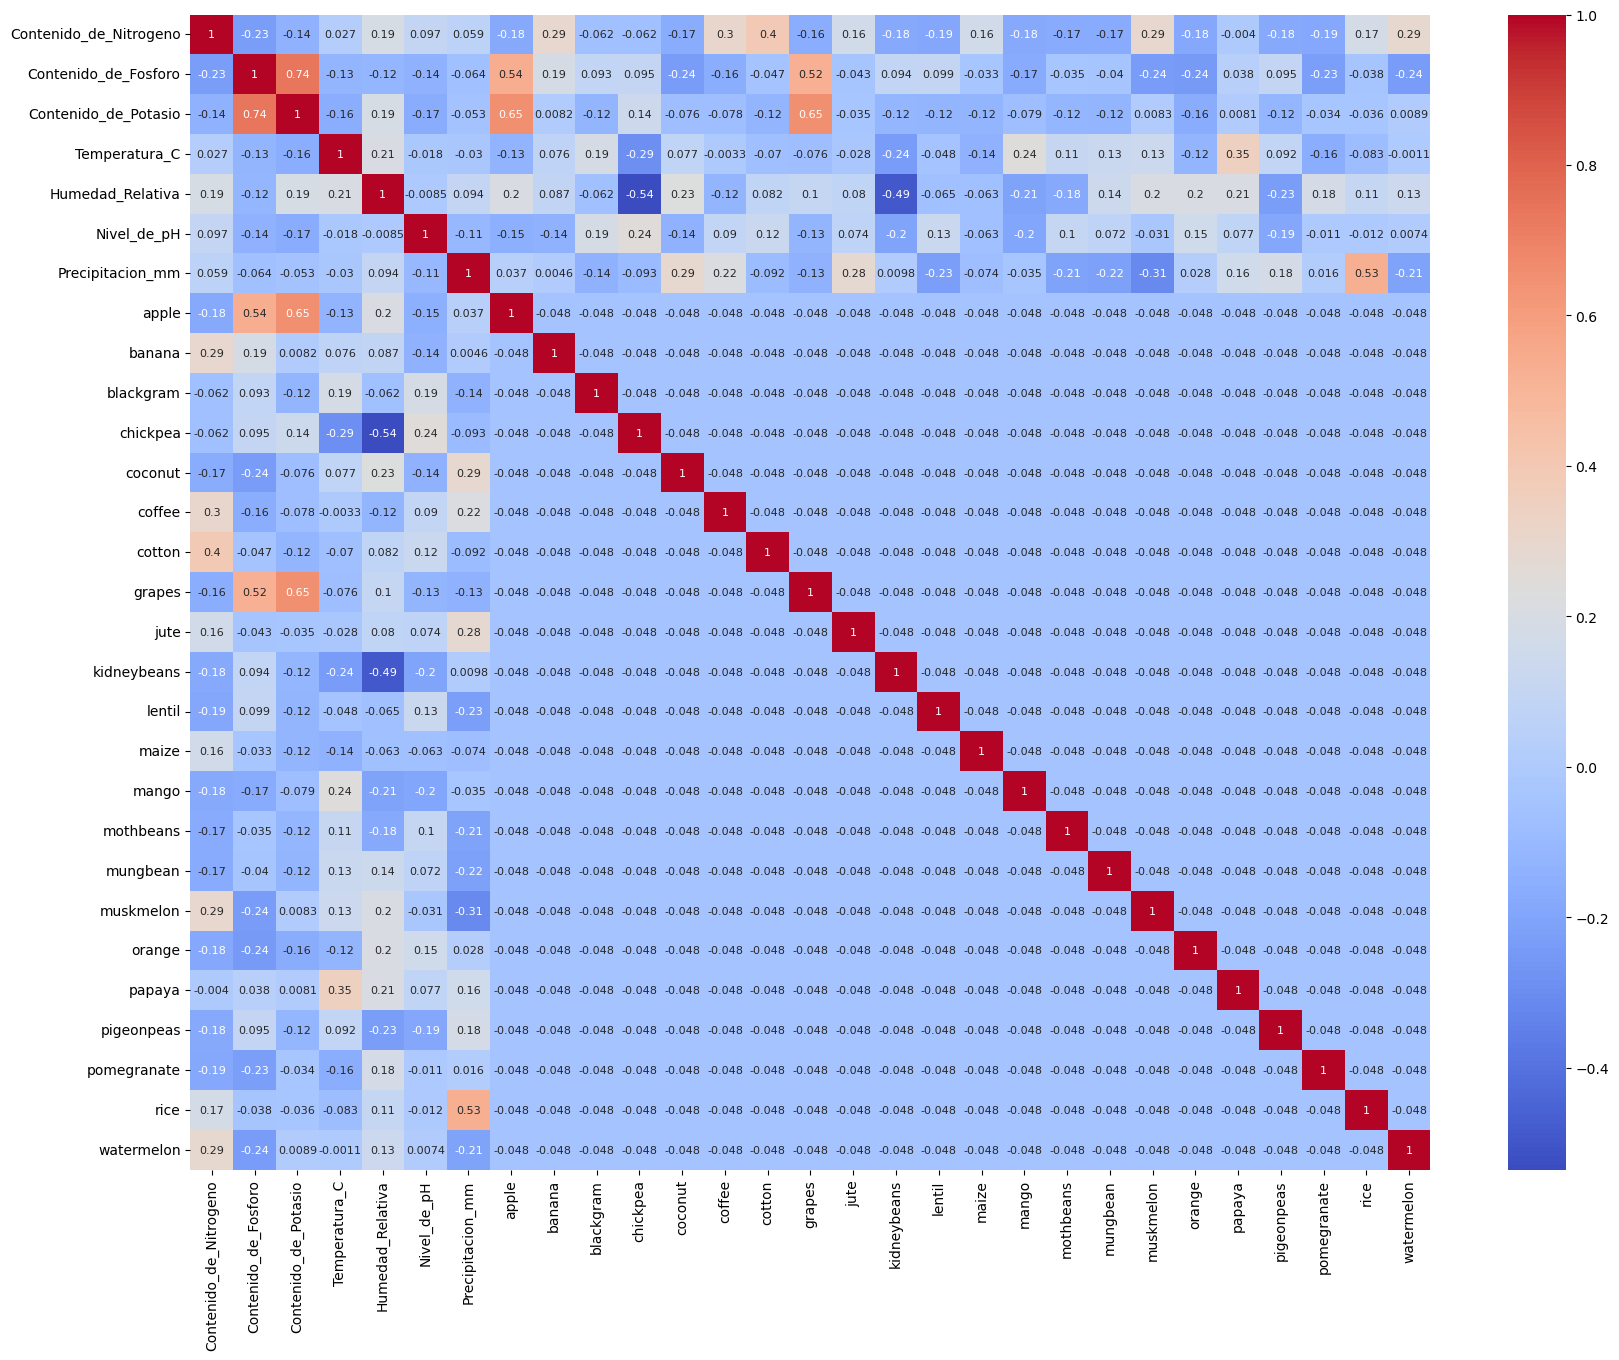

In [17]:
plt.figure(figsize=(20,15))
sns.heatmap(cultivos2.corr(),cmap = 'coolwarm',annot = True,annot_kws= {"size":8})

We can observe from the correlation matrix that the relationship between the crop types is all the same, which makes sense since all the values were either 0 or 1.


We can see that there are stronger positive relationships (those with higher values and colored closer to orange).


The relationship between Phosphorus and Potassium content and apples is strong, as it is with grapes. On the other hand, rice shows a high correlation with the level of precipitation.

Therefore, if the soil has high levels of phosphorus and potassium, I recommend planting apples or grapes. However, if the area where you're cultivating has high precipitation levels, I recommend planting rice.


How does the crop recommendation vary according to soil and climate conditions?


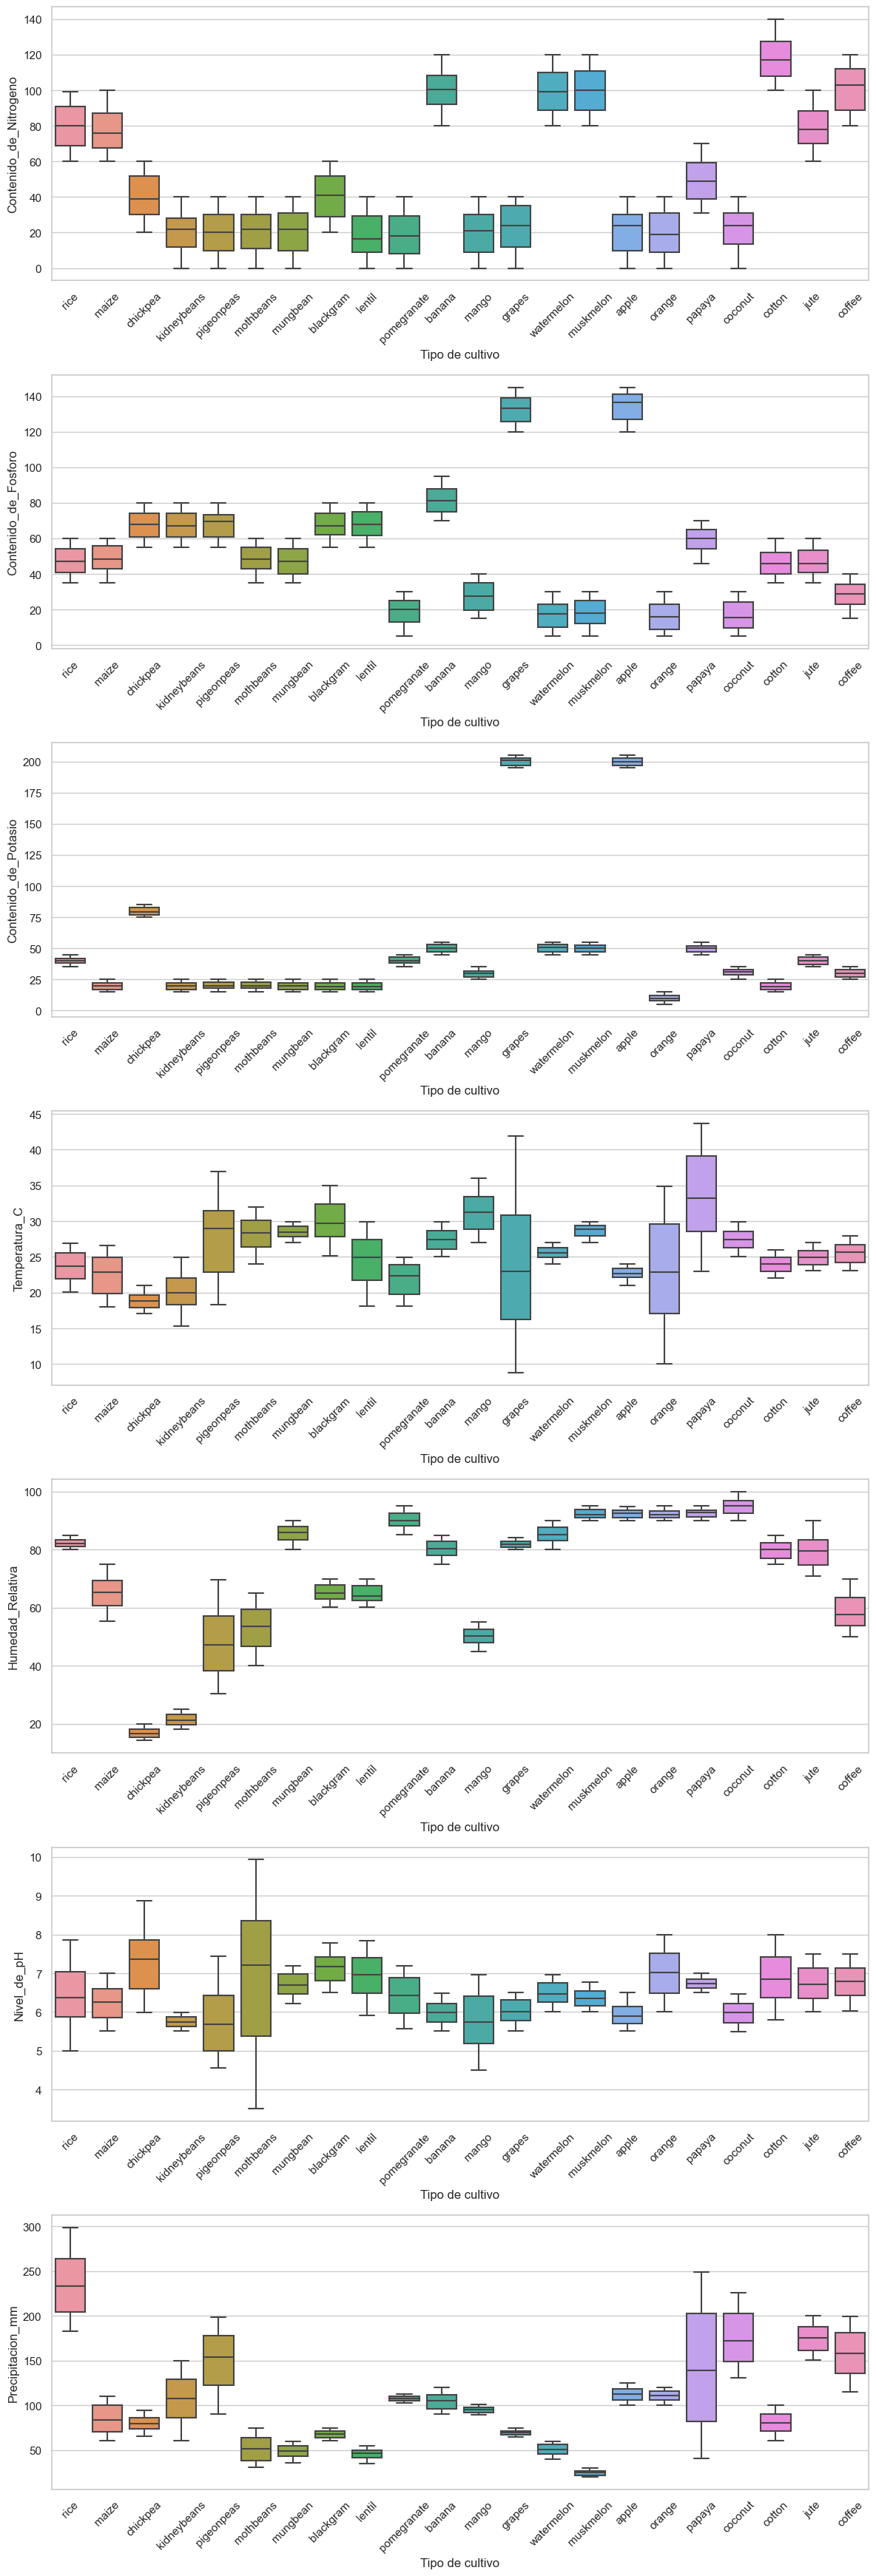

In [35]:
sns.set(style='whitegrid')
columns_to_plot= ['Contenido_de_Nitrogeno','Contenido_de_Fosforo','Contenido_de_Potasio','Temperatura_C','Humedad_Relativa','Nivel_de_pH','Precipitacion_mm']
fig,axes = plt.subplots(len(columns_to_plot),1,figsize=(12,5*len(columns_to_plot)))

for i,column in enumerate(columns_to_plot):
    sns.boxplot(data=df, x='Tipo_de_Cultivo',y=column, ax=axes[i])
    axes[i].set_ylabel(f'{column}')
    axes[i].set_xlabel('Tipo de cultivo')
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout() #para que no se pisen los graficos
plt.show()

Analysis of the previous chart:

Contenido_de_Fosforo → Crops most recommended for high phosphorus levels are **apple** and **grapes**. If your soil has low potassium levels, the recommended crops are: **orange, pomegranate, coconut, watermelon**, and **muskmelon**.

Contenido_de_Nitrogeno → If nitrogen is high, it is recommended to plant crops like **cotton, muskmelon, watermelon, banana**, and **coffee**.

Contenido_de_Potasio → If potassium level is high, **apple** and **grapes** are recommended as their boxplots stand out above the others. On the other hand, if potassium is low, **orange** is a better choice.

Temperatura_C → For temperature, the crop boxplots are almost aligned. This happens because temperature values tend to stay within a reasonable range (not extreme like 100°C). This causes the data to cluster within similar values, even though each crop may have a slightly higher or lower average.

Humedad_Relativa → With lower humidity, crops like **chickpea** and **kidneybeans** are recommended. If humidity rises, the recommended crops are **coconut, papaya, orange, apple**, and **muskmelon**.

Nivel_de_pH → It's important to understand that pH measures how acidic or basic the soil is, on a scale from 0 to 14. In the histogram, it was bell-shaped, and when analyzing the crops, a similar pattern was seen. **Mothbeans** appears to be the most versatile in terms of tolerating a wide range of pH levels. So if you're unsure about your soil's pH, **mothbeans** is a safe recommendation.

Precipitacion_mm → As previously stated and seen in the correlation matrix, **rice** is recommended for areas with high precipitation, as it needs a lot of water to thrive. On the other hand, if you're in an arid region, **muskmelon** or **lentil** would be better choices.


 Machine Learning

 In this section, we will implement two Machine Learning models to predict the `Tipo_de_Cultivo` based on soil and climate variables. We will use **Logistic Regression** and a **Decision Tree** classifier.

Instructions for Implementing the Code:
Use the following Python code as a base to implement the **Decision Tree** model:


Decision tree

In [19]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [20]:
cultivos['Tipo_de_Cultivo'] = LE.fit_transform(cultivos['Tipo_de_Cultivo'])

cultivos.sample(5)

,Contenido_de_Nitrogeno,Contenido_de_Fosforo,Contenido_de_Potasio,Temperatura_C,Humedad_Relativa,Nivel_de_pH,Precipitacion_mm,Tipo_de_Cultivo,apple,banana,...,mango,mothbeans,mungbean,muskmelon,orange,papaya,pigeonpeas,pomegranate,rice,watermelon
700,56,79,15,29.484,63.199,7.455,71.891,2,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
172,86,37,16,20.517,59.212,5.562,67.610,11,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
399,22,60,24,18.782,20.248,5.631,104.257,9,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1283,39,140,203,21.119,80.634,6.350,69.278,7,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1129,34,16,25,30.072,50.960,6.107,92.096,12,0.000,0.000,...,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [21]:
from sklearn.model_selection import train_test_split
X = cultivos[['Contenido_de_Nitrogeno','Contenido_de_Fosforo', 'Contenido_de_Potasio', 'Temperatura_C' ,'Humedad_Relativa', 'Nivel_de_pH', 'Precipitacion_mm']]
y = cultivos[['Tipo_de_Cultivo']]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
# Crear el modelo
decision_tree_model = DecisionTreeClassifier(criterion="entropy", random_state=2,
max_depth=5) #max_depth son los niveles que va a tener mi arbol, y random_state es mi semilla 

decision_tree_model.fit(X_train, y_train)

# Validación cruzada
score = cross_val_score(decision_tree_model, X, y, cv=5)  #va a separar en 5 diferentes #me muestra la prepcision del modelo
print('Puntuación de validación cruzada:', score)
# Precisión en entrenamiento
dt_train_accuracy = decision_tree_model.score(X_train, y_train)
print("Precisión en entrenamiento =", dt_train_accuracy)
# Precisión en pruebas
dt_test_accuracy = decision_tree_model.score(X_test, y_test)
print("Precisión en pruebas =", dt_test_accuracy)



Puntuación de validación cruzada: [0.93636364 0.90909091 0.91818182 0.87045455 0.93636364]
Precisión en entrenamiento = 0.8875
Precisión en pruebas = 0.865909090909091


The training precision response explains that 0.8875% of the samples given for training data were correctly separated.
The testing precision response explains that 0.86% of the data in the sample given for the text were correctly classified.

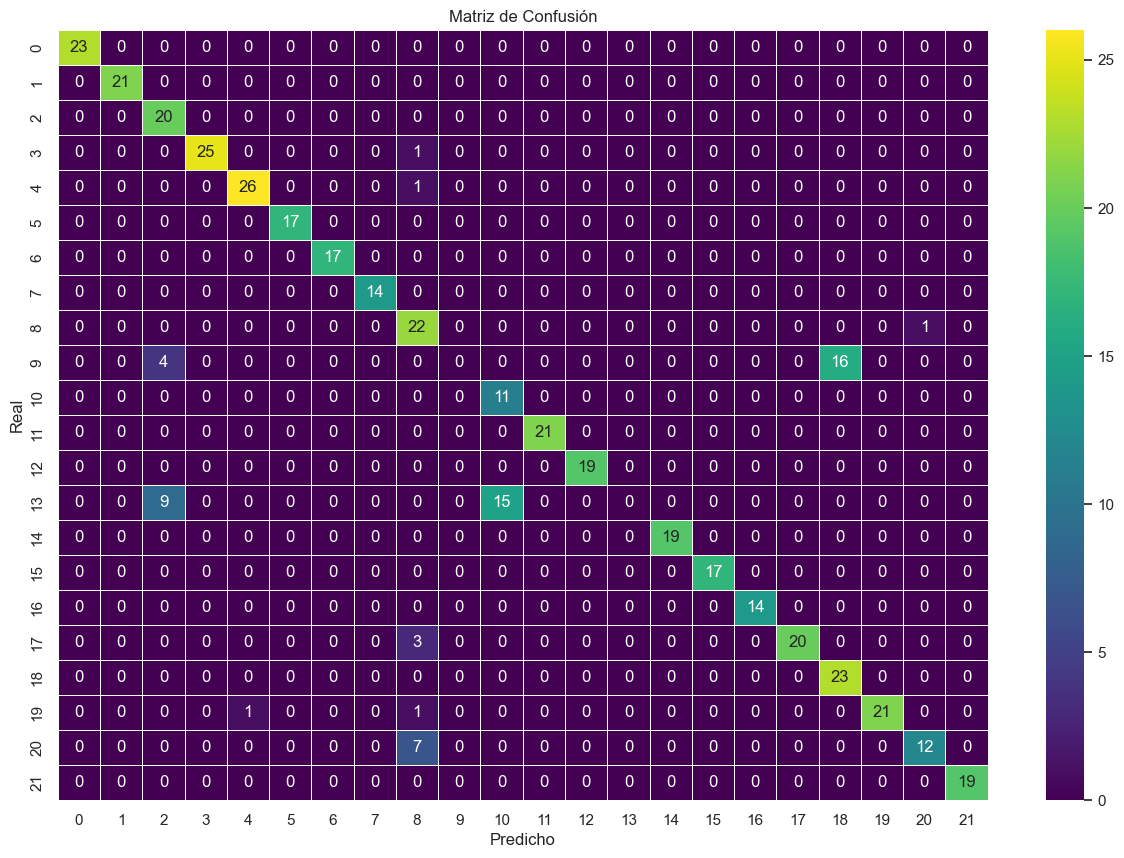

In [29]:
# Matriz de confusión
y_pred = decision_tree_model.predict(X_test)
y_true = y_test
from sklearn.metrics import confusion_matrix
cm_dt = confusion_matrix(y_true, y_pred)
# Visualización de la matriz de confusión
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(cm_dt, annot=True, linewidth=0.5, fmt=".0f", cmap='viridis', ax=ax)
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title('Matriz de Confusión')
plt.show()

The diagonal that goes from the upper left corner to the lower right corner shows us how many of our data were classified correctly, that is, a true positive and a true negative.


The deviations from the diagonal show us the errors in our matrix, those that are "below the diagonal" and those that are "above the diagonal."
Above the diagonal are the false positives, which are when we said they were one thing and we were wrong, and below the diagonal are the false negatives, which is when we said they weren't a culture and it ended up being that one.

The model was more mistaken with mothbeans n13 (confusing it with blackgram n2) and lentil n9 confused it with pigeonpeas n18

In [36]:
cultivos.columns

Index(['Contenido_de_Nitrogeno', 'Contenido_de_Fosforo',
       'Contenido_de_Potasio', 'Temperatura_C', 'Humedad_Relativa',
       'Nivel_de_pH', 'Precipitacion_mm', 'Tipo_de_Cultivo', 'apple', 'banana',
       'blackgram', 'chickpea', 'coconut', 'coffee', 'cotton', 'grapes',
       'jute', 'kidneybeans', 'lentil', 'maize', 'mango', 'mothbeans',
       'mungbean', 'muskmelon', 'orange', 'papaya', 'pigeonpeas',
       'pomegranate', 'rice', 'watermelon'],
      dtype='object')

In [24]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix
import graphviz
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from sklearn import tree


In [25]:
cultivos

,Contenido_de_Nitrogeno,Contenido_de_Fosforo,Contenido_de_Potasio,Temperatura_C,Humedad_Relativa,Nivel_de_pH,Precipitacion_mm,Tipo_de_Cultivo,apple,banana,...,mango,mothbeans,mungbean,muskmelon,orange,papaya,pigeonpeas,pomegranate,rice,watermelon
0,90,42,43,20.880,82.003,6.503,202.936,20,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000
1,85,58,41,21.770,80.320,7.038,226.656,20,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000
2,60,55,44,23.004,82.321,7.840,263.964,20,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000
3,74,35,40,26.491,80.158,6.980,242.864,20,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000
4,78,42,42,20.130,81.605,7.628,262.717,20,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.775,66.413,6.780,177.775,5,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2196,99,15,27,27.417,56.636,6.087,127.925,5,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2197,118,33,30,24.132,67.225,6.363,173.323,5,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2198,117,32,34,26.272,52.127,6.759,127.175,5,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


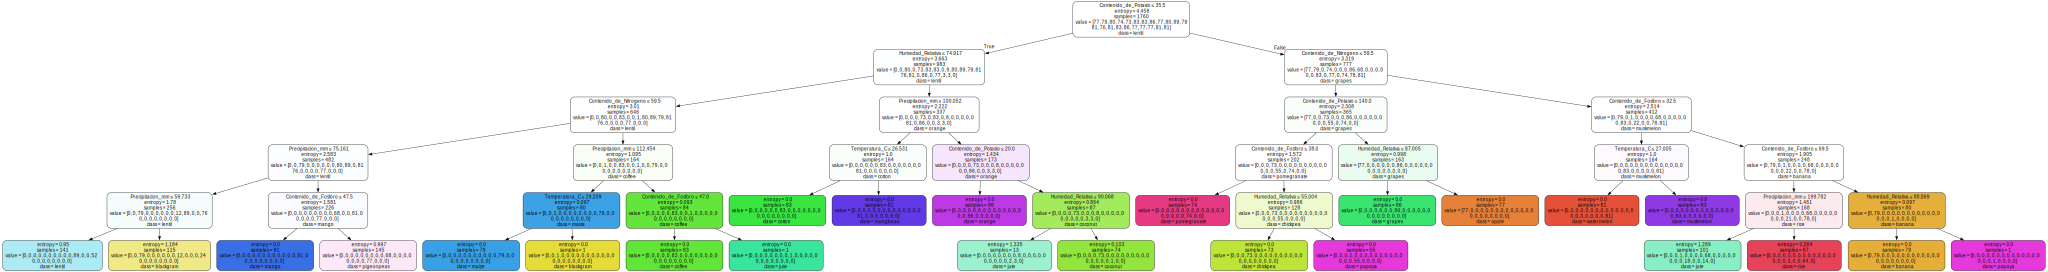

In [26]:
labels= X.columns
targets = LE.classes_
data = export_graphviz(decision_tree_model, out_file=None, feature_names=labels, class_names=targets, filled=True, rounded=True, special_characters=True)
graph= graphviz.Source(data)
graph

Logistic regression

In [30]:
import statsmodels.api as sm
logist_model=sm.MNLogit(y_train,sm.add_constant(X_train))
logist_model
result=logist_model.fit(method="bfgs")
stats1=result.summary()
print(stats1)

c:\Users\chiar\anaconda3\Lib\site-packages\scipy\optimize\_optimize.py:1359: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(f, x0, args, fprime, callback=callback, **opts)
c:\Users\chiar\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.679007
         Iterations: 35
         Function evaluations: 44
         Gradient evaluations: 44
                          MNLogit Regression Results                          
Dep. Variable:        Tipo_de_Cultivo   No. Observations:                 1760
Model:                        MNLogit   Df Residuals:                     1592
Method:                           MLE   Df Model:                          147
Date:                Thu, 16 Nov 2023   Pseudo R-squ.:                  0.7802
Time:                        21:58:42   Log-Likelihood:                -1195.1
converged:                      False   LL-Null:                       -5438.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
     Tipo_de_Cultivo=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.0157      3.754     -0.

Accuracy: 0.8431818181818181
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        23
           1       0.91      1.00      0.95        21
           2       0.74      0.85      0.79        20
           3       1.00      1.00      1.00        26
           4       1.00      0.78      0.88        27
           5       0.94      1.00      0.97        17
           6       0.74      1.00      0.85        17
           7       0.93      1.00      0.97        14
           8       0.46      0.83      0.59        23
           9       0.88      0.75      0.81        20
          10       0.75      0.82      0.78        11
          11       1.00      0.57      0.73        21
          12       1.00      1.00      1.00        19
          13       0.86      0.79      0.83        24
          14       0.76      1.00      0.86        19
          15       1.00      1.00      1.00        17
          16       0.70      1.00      0.82        1

c:\Users\chiar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\chiar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\chiar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


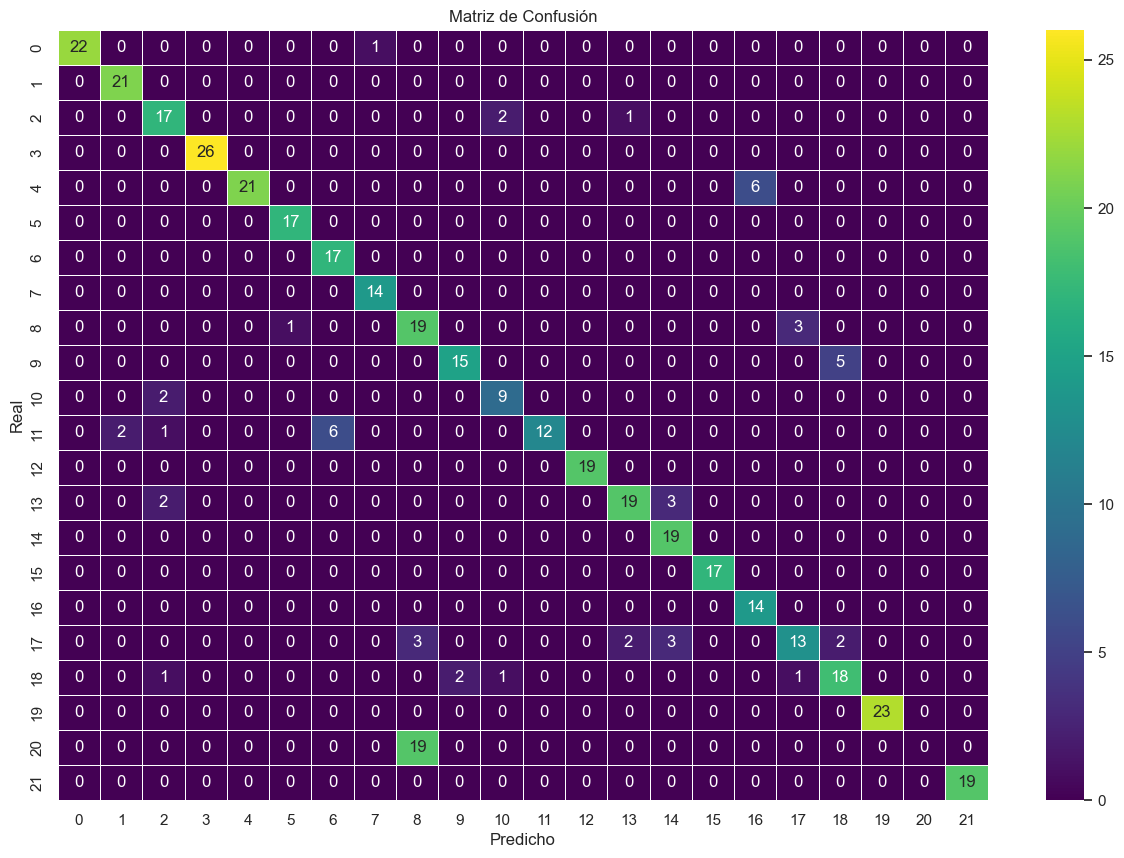

In [28]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as  np

y_pred = result.predict(sm.add_constant(X_test))
y_pred_labels = np.argmax(y_pred.values, axis=1)


accuracy = accuracy_score(y_test, y_pred_labels)
print(f'Accuracy: {accuracy}')

print(classification_report(y_test, y_pred_labels))

cm = confusion_matrix(y_test, y_pred_labels)
print('Confusion Matrix:')
# print(cm)

# Visualización de la matriz de confusión
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(cm, annot=True, linewidth=0.5, fmt=".0f", cmap='viridis', ax=ax)
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title('Matriz de Confusión')
plt.show()

In [39]:
cultivos.columns

Index(['Contenido_de_Nitrogeno', 'Contenido_de_Fosforo',
       'Contenido_de_Potasio', 'Temperatura_C', 'Humedad_Relativa',
       'Nivel_de_pH', 'Precipitacion_mm', 'Tipo_de_Cultivo', 'apple', 'banana',
       'blackgram', 'chickpea', 'coconut', 'coffee', 'cotton', 'grapes',
       'jute', 'kidneybeans', 'lentil', 'maize', 'mango', 'mothbeans',
       'mungbean', 'muskmelon', 'orange', 'papaya', 'pigeonpeas',
       'pomegranate', 'rice', 'watermelon'],
      dtype='object')

The accuracy is 0.843, which is lower than that obtained by the decision tree model.
The diagonal represents the same as in the previous case; it shows the correctly classified data.

The algorithm becomes more confused when it tries to predict rice, which is located in column/row number 20. We can see that it didn't correctly identify any of the rice it tried to identify and confused it with jute number 8.

It may happen that you make a mistake when predicting ALL the rice varieties because
- the sample was randomly taken without capturing the rice data (it is a sample, but it may happen that there is none)
- there is very little rice data and a lot of the other ones, so you can say which crop it is not, but you cannot fully define which one it is.